# Interested Day Analysis

### Contents :

Take into account that the number of products in each category may influnce the reviews
- [✔] Consider the average review number for product in each category 
- [✔] Consider the median review number for product in each category 
- [  ] Find the explnation for this 


Intersted day analysis in different categoties
- [✔] Interested day rating and review for different categories
- [✔] Compare interested day rating and review quantity with year's average 
- [✔] International Healthy Day
- [✔] Chirimas Day
- [✔] Black Friday



In [1]:
# Math Packages
import math
import pandas as pd
import numpy as np

# Plot Packages 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Other Packages 
from datetime import *
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# File path
DATA_FOLDER = "./data/"
META_HEALTH_CARE = "health_metadata.pkl"
REVIEWS_HEALTH_CARE = "health_review.pkl"
HEALTH_CARE = "health_merge.pkl"

###  Health merge

#### 1.1 Load the dataset

In [3]:
df_health_merge_review = pd.read_pickle(DATA_FOLDER + HEALTH_CARE)
df_health_merge_review.head(3)

,asin,helpful,overall,reviewText,ReviewTime,title,related,salesRank,categories,price,brand
0,0077614992,"[0, 0]",5,This book was a requirement for a college clas...,2013-02-15,Principles of Mgmt + Oper-CSUF Custom C,"{'also_bought': ['0471730726', '0132834871', '...",{'Health & Personal Care': 168429},[[Health & Personal Care]],0.00,NaN
1,0615208479,"[0, 0]",5,This is a great gift for anyone who wants to h...,2008-12-01,Brain Fitness Exercises Software,NaN,{'Health & Personal Care': 1346973},"[[Health & Personal Care, Personal Care]]",0.00,NaN
2,0615269990,"[0, 0]",5,Very helpful in learning about different disea...,2014-04-06,Occam's Razor,"{'also_bought': ['1935660152', '0071743979', '...",{'Toys & Games': 110575},"[[Health & Personal Care, Personal Care, Shavi...",34.99,NaN


#### 1.2 Split the category into several **sub-categories**.  

- For example, Split [ ['Health & Personal Care',
  'Personal Care',
  'Shaving & Hair Removal',
  'Manual Shaving'] ] into 4 class  
- 1st category is : 'Health & Personal Care'  
- 2nd category is : 'Personal Care'  
- 3rd category is : 'Shaving & Hair Removal'  
- 4th category is : 'Manual Shaving'

In [4]:
df_health_merge_review.categories[2]

[['Health & Personal Care',
  'Personal Care',
  'Shaving & Hair Removal',
  'Manual Shaving']]

In [5]:
# split the category into several sub-categories
health_cat = df_health_merge_review.categories.apply(lambda x : x[0]).values.tolist()
df_health_category = pd.DataFrame(health_cat)
df_health_category.columns = ['1st','2nd','3rd','4th','5th','6th','7th']
df_health_category.head()

,1st,2nd,3rd,4th,5th,6th,7th
0,Health & Personal Care,None,None,None,None,None,None
1,Health & Personal Care,Personal Care,None,None,None,None,None
2,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None
3,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None
4,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None


⬆Since the 1st sub-categories always is ```Health & Personal Care```, we would like to analyze the 2nd sub-categories, and find the average rating and review quantity through years based on this.

####  1.3 Missing rate of 2nd sub-categories

- First, we calcalate the missing rate of 2nd sub-categories. If the missing rate is small we can ignore it since it will have not influnce to out analysis.

In [6]:
# None value rate 
missing_2nd = df_health_category[df_health_category.iloc[:,1].isnull()]['1st'].count()/df_health_category.shape[0]
print( 'Missing rate of 2nd sub-categories is {:.2f}%'.format(missing_2nd*100))

Missing rate of 2nd sub-categories is 2.80%


In [7]:
df_health_category['asin'] = df_health_merge_review.asin
df_health_category['overall'] = df_health_merge_review.overall
df_health_category['time'] = df_health_merge_review.ReviewTime

In [8]:
rating_avg = df_health_category.groupby('2nd')[['overall']].mean().sort_values('overall',ascending = False)
review_quantity = df_health_category.groupby('2nd')[['overall']].count().sort_values('overall',ascending = False)

#### 1.4 The number of products in each category may influnce the reviews

 1.4.1 Consider the average review number for product in each category 

In [9]:
# Groupby
grouped_df = df_health_category.groupby('2nd')

In [10]:
# calculate the review quantity for each category
grouped_df.count()[['overall']]

,overall
2nd,
Baby & Child Care,6920
Health Care,537734
Household Supplies,388123
Medical Supplies & Equipment,477769
Personal Care,599217
Sexual Wellness,105656
Sports Nutrition,147376
Stationery & Party Supplies,43783
Vitamins & Dietary Supplements,574861


In [11]:
# calculate the number of products for each category
grouped_df[['asin']].nunique()[['asin']]

,asin
2nd,
Baby & Child Care,1152
Health Care,56030
Household Supplies,40538
Medical Supplies & Equipment,48032
Personal Care,59652
Sexual Wellness,13851
Sports Nutrition,16656
Stationery & Party Supplies,8565
Vitamins & Dietary Supplements,61857


In [12]:
# calculate the average review number for product in each category
aver_cate = pd.DataFrame(grouped_df.count()['overall'].divide(grouped_df[['asin']].nunique()['asin']))
aver_cate.columns = ['average_review_number']
aver_cate = aver_cate.sort_values('average_review_number',ascending = False)
aver_cate

,average_review_number
2nd,
Personal Care,10.045212
Medical Supplies & Equipment,9.946890
Health Care,9.597251
Household Supplies,9.574301
Vitamins & Dietary Supplements,9.293386
Sports Nutrition,8.848223
Sexual Wellness,7.628041
Baby & Child Care,6.006944
Stationery & Party Supplies,5.111851


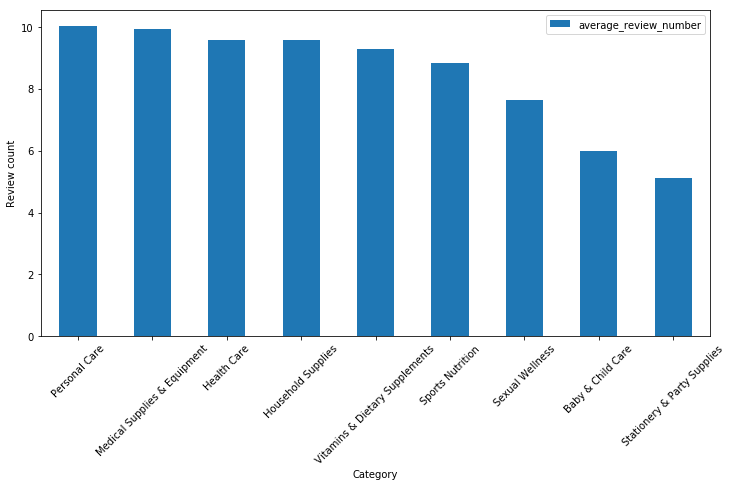

In [13]:
_, ax1 = plt.subplots(figsize = (12,6))
aver_cate.plot.bar(ax=ax1,rot=45)
ax1.set_xlabel('Category')
ax1.set_ylabel('Review count')
plt.show()

 1.4.2 Consider the median review number for product in each category 

In [14]:
df_median = df_health_category.groupby(['2nd','asin']).count()[['overall']]

In [15]:
df_median.head(12)

overall
2nd               asin               
Baby & Child Care 8921422722        3
                  8921422749        1
                  9029300965        2
                  9533223510       24
                  9533225181        2
                  B000052YHS       15
                  B0000536Y7       26
                  B000067ETT        1
                  B0000798CT        2
                  B000083JX0        1
                  B00008DQJQ        1
                  B000092LY1        1

In [16]:
df_median = df_median.groupby(level=[0]).median()
df_median

,overall
2nd,
Baby & Child Care,2
Health Care,2
Household Supplies,2
Medical Supplies & Equipment,2
Personal Care,2
Sexual Wellness,2
Sports Nutrition,2
Stationery & Party Supplies,2
Vitamins & Dietary Supplements,2


Since the median value for each category is 2, this method does not work.

#### 1.5 Intersted day analysis in different categoties

In [19]:
def interested_day_all_categories(df,interested_day_name,year,month,day,list_category_name):
    '''
       Plot rating average and review quantity in interested day 
        for different categories 
    
       Parameter: 
       df : a dataframe
       interested_day_name : interested day's name
       year : selected year
       month : the month of interested day
       day : the day of interested day
       list_category_name : a name list of category 
    '''
    fig, ax = plt.subplots(2,1,figsize = (12,12))

    interested_day = df.loc[(df.time.dt.month == month)&(df.time.dt.day == day)&(df.time.dt.year == year)]
    interested_year = df[df.time.dt.year == year]

    # Rating average
    i_day = interested_day.groupby('2nd')[['overall']].mean()
    i_day.plot(ax=ax[0])

    i_year = interested_year.groupby('2nd')[['overall']].mean()
    i_year.plot(ax=ax[0])

    # 需要命名横坐标
    ax[0].legend(labels=['Interested_day','Year average'])
    ax[0].xaxis.set_ticks(np.arange(len(list_category_name)),list_category_name)
    ax[1].set_xlabel('categories')
    ax[0].set_ylabel('Rating average')
    ax[0].set_title('Rating average for each category in' +interested_day_name)

    # Review quantity
    i_day_q = interested_day.groupby('2nd')[['overall']].count()
    i_day_q.plot(ax=ax[1])

    i_year_q = interested_year.groupby('2nd')[['overall']].count()/365
    i_year_q.plot(ax=ax[1])

    ax[1].legend(labels=['Interested_day','Year_review_quantity_average'])
    ax[1].set_xlabel('categories')
    ax[1].set_ylabel('Review quantity')
    ax[1].set_title('Review quantity for each category in ' +interested_day_name)

    plt.show()

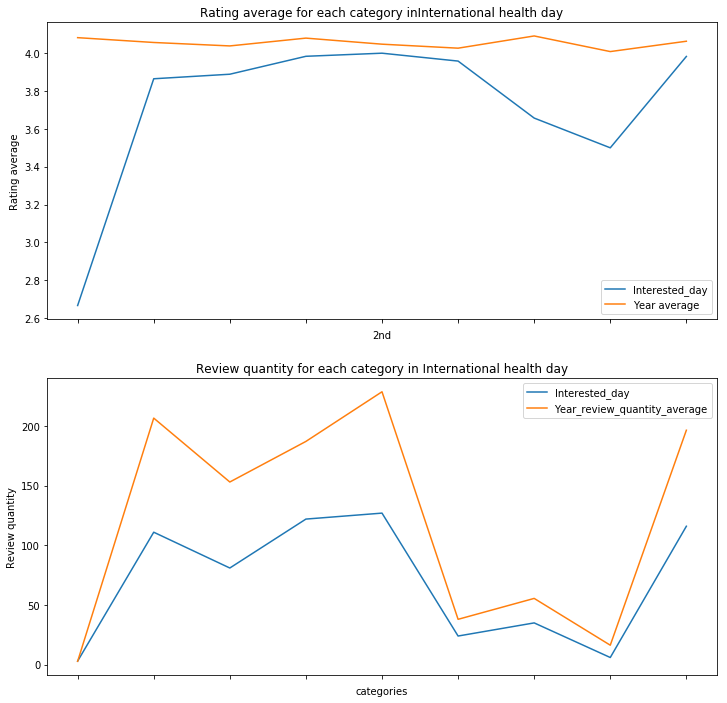

In [20]:
interested_day_name = 'International health day'
month = 4
day = 7
year = 2012
df = df_health_category
list_category_name = df_median.index.values.tolist()
interested_day_all_categories(df,interested_day_name,year,month,day,list_category_name)

In [21]:
def interested_day(df,interested_day_name,month,day,cat_name):
    
    '''
       Plot rating trend and review quantity in interested day 
       between 2004-2014 for selected categories
    
       Parameter: 
       df : a dataframe
       interested_day_name : interested day's name
       month : the month of interested day
       day : the day of interested day
       cat_name : a category 
    '''


    fig, ax = plt.subplots(2,1,figsize = (12,12))

    interested_day = df.loc[(df.time.dt.month == month)&(df.time.dt.day == day)]
    intersted_category = df[df['2nd'] == cat_name]

    # Rating average 
    d = interested_day.groupby(interested_day.time.dt.year)[['overall']].mean()
    d = d.loc[d.index>2003]
    d.index = d.index.astype('int')
    d[d.index>2003].plot(ax=ax[0])

    inter = intersted_category.groupby(intersted_category.time.dt.year)[['overall']].mean()
    inter = inter.loc[inter.index>2003]
    inter.index = inter.index.astype('int')
    inter[inter.index>2003].plot(ax=ax[0])

    ax[0].legend(labels=['Interested_day','Year average'])
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Rating average')
    ax[0].set_title('Rating change for '+cat_name+' in ' +interested_day_name+ ' through years')


    # Reviw quantity
    d_q = interested_day.groupby(interested_day.time.dt.year)[['overall']].count()
    d_q = d_q.loc[d_q.index>2003]
    d_q.index = d_q.index.astype('int')
    d_q[d_q.index>2003].plot(ax=ax[1])

    inter_q  = intersted_category.groupby(intersted_category.time.dt.year)[['overall']].count()/365
    inter_q  = inter_q.loc[inter_q.index>2003]
    inter_q.index = inter_q.index.astype('int')
    inter_q[inter_q.index>2003].plot(ax=ax[1])

    ax[1].legend(labels=['Interested_day','Year_review_quantity_average'])
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Review quantity')
    ax[1].set_title('Review quantity for '+cat_name+' in ' +interested_day_name+ ' through years')

    plt.show()
    return fig

**International health day**

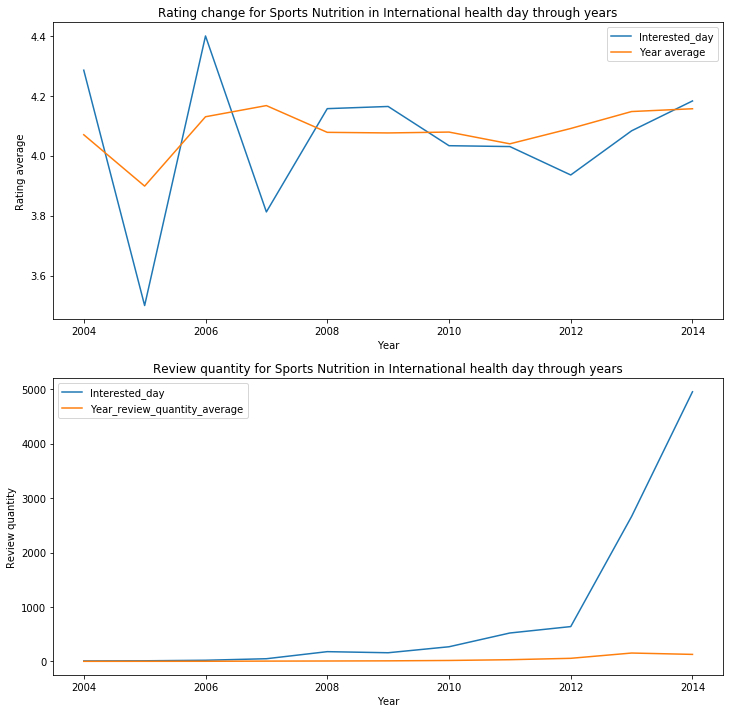

In [22]:
interested_day_name = 'International health day'
month = 4
day = 7
df = df_health_category
cat_name = rating_avg.index.values.tolist()[0]
fig3 = interested_day(df,interested_day_name,month,day,cat_name)

```Explanation```

**Christmas Day**

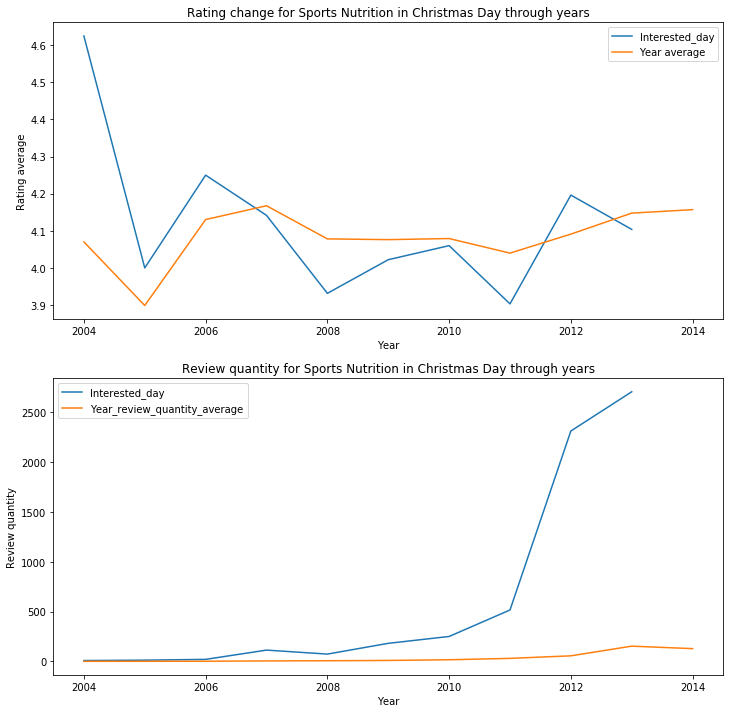

In [23]:
interested_day_name = 'Christmas Day'
month = 12
day = 25
df = df_health_category
cat_name = rating_avg.index.values.tolist()[0]
fig1 = interested_day(df,interested_day_name,month,day,cat_name)

```Explantion```

大家的购买欲望增加，但是评分不是很好

**Black Friday**

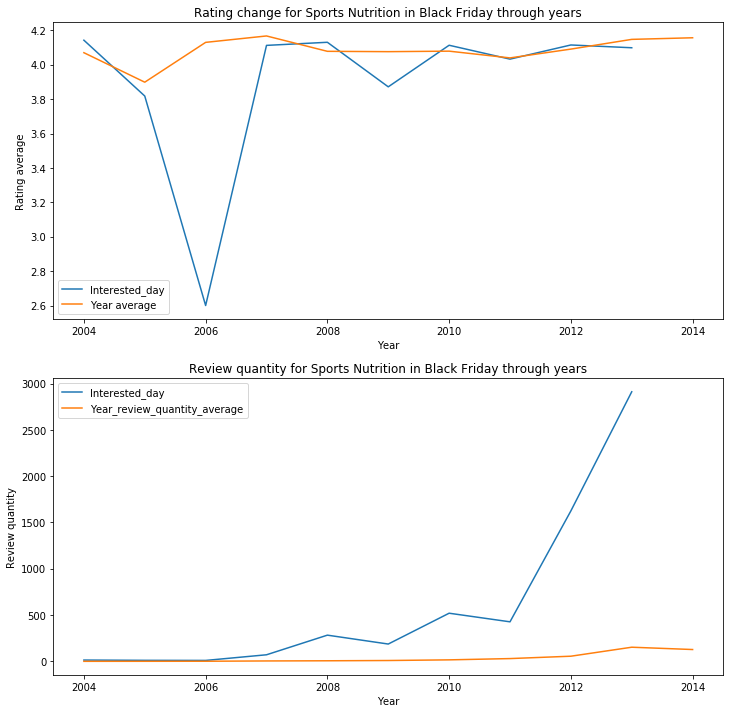

In [24]:
interested_day_name = 'Black Friday'
month = 11
day = 23
df = df_health_category
cat_name = rating_avg.index.values.tolist()[0]
fig2 = interested_day(df,interested_day_name,month,day,cat_name)

```Explantion```

大家的购买欲望急剧增加，但是评分在2006年特别不好，需要寻找原因